In [3]:
%matplotlib inline
import sys
import os
import matplotlib.pyplot as plt
from sbi.inference.abc.smcabc import SMCABC as abc
from sbi import utils as utils_sbi
import seaborn as sns
import styling_funcs as style
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable
import global_vars as gvars
module_path = os.path.abspath(os.path.join('..', 'ABC'))
if module_path not in sys.path:
    sys.path.append(module_path)
from ABC import *


In [4]:
# Load the Posterior
# results of the ABC optimize assemblies
ps = [0.95]
posteriors =[np.load('results/ABC_p=%s_v1_4par.npy'%p,allow_pickle=1) for p in ps]
# posteriors[-1]=posteriors[-1][:-2]
posteriors = [np.load('results/ABC_p=0.95.npy',allow_pickle=1),]


<Figure size 432x288 with 0 Axes>

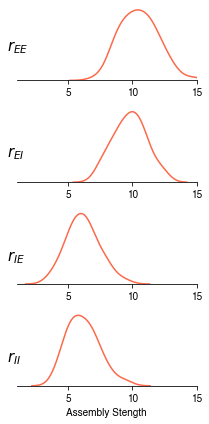

In [5]:
#  PANEL i
# Posterior samples from the last step
samples = [posterior[-1]['theta accepted'].T for posterior in posteriors]
plt.figure()
colors = sns.color_palette('Reds',n_colors = len(ps))
plt.figure(figsize=(3,6))
labels = ['$r_{EE}$','$r_{EI}$','$r_{IE}$','$r_{II}$']
for i in range(4):
    plt.subplot(4,1,i+1)
    for p_i,p in enumerate(ps):
        sns.kdeplot(samples[p_i][:,i],color=colors[p_i],bw_method=0.5)
        plt.xlim(1,15)
        plt.text(0.25,.1,labels[i],{'fontsize':15})
        # plt.ylim(0,0.3)
        if p_i<len(ps):
            sns.despine(left=1)
            plt.yticks([])
            # plt.xticks([])
            plt.ylabel('')
            # plt.axis('off')
        # else:
            # sns.despine(left=1)

plt.xlabel('Assembly Stength')
#legend

# plt.xticks(np.arange(20))
plt.tight_layout()

In [6]:
# Spike trains

Starting simulation at t=0. s for a duration of 30. s
13.1594 s (43%) simulated in 10s, estimated 13s remaining.
26.1558 s (87%) simulated in 20s, estimated 3s remaining.
30. s (100%) simulated in 22s
0.11854882820007367
Starting simulation at t=0. s for a duration of 30. s
12.7306 s (42%) simulated in 10s, estimated 14s remaining.
25.3021 s (84%) simulated in 20s, estimated 4s remaining.
30. s (100%) simulated in 23s
0.0024229788583814958


(0.0, 1.0, -49.95, 1048.95)

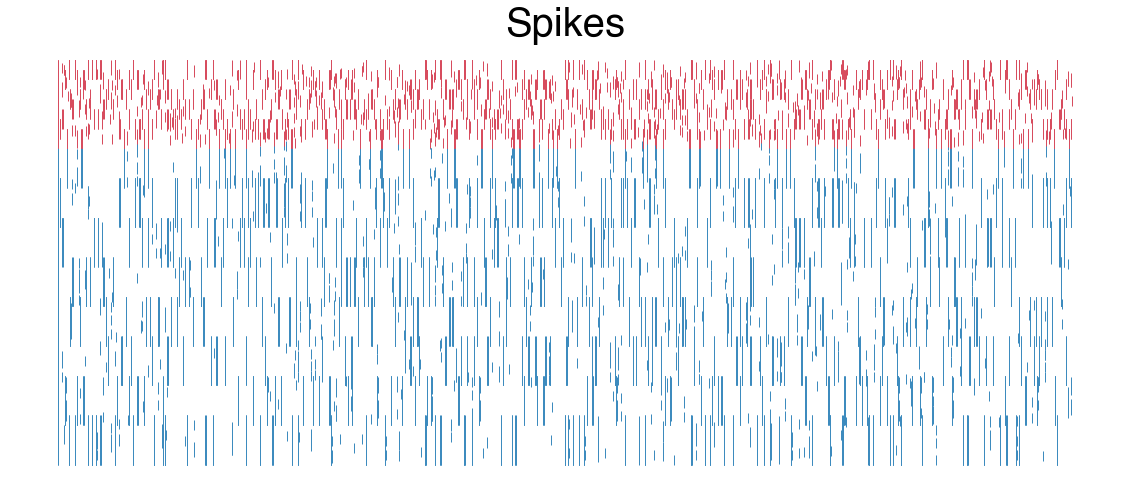

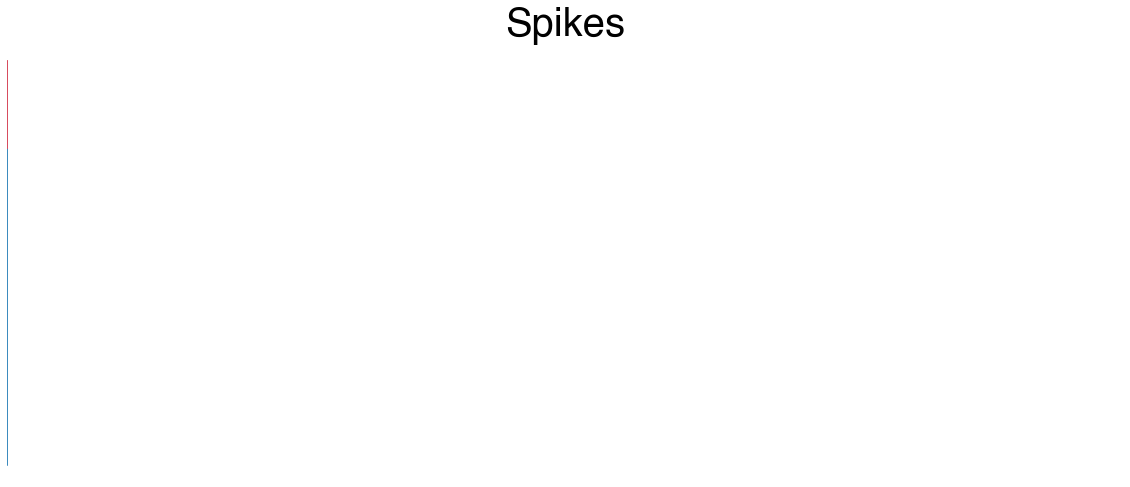

In [8]:
module_path = os.path.abspath(os.path.join('..', 'Networks'))
if module_path not in sys.path:
    sys.path.append(module_path)

from Spike_Trains_Assemblies import *
def RGB(x, y, z):
    return [x/255, y/255, z/255]

# Assemblies
Data = get_spikes(NSigs = 8, W =(1/0.95)*8.5, p = 0.95, noise_ratio = 0.2, 
                  R = [10.94370168, 10.38550318,  5.84189538,  5.64140936])
# 10.5079433 ,  8.57839715,  3.03370012,  2.02440814, 12.86209129
i_e, t_e = Data[0]
i_i, t_i = Data[1]
i_i_m  = i_i + 800
fig, axes = plt.subplots(figsize=(20, 8))
# np.save('/home/ovinogradov/Projects/recurrent-connectivity-plasticity/data/output_spk_network/R4r1 ',[t_e/ms,i_e+0,t_i/ms,i_i_m])
# np.save('results/spikes_no_clusters',[t_e/ms,i_e,t_i/ms,i_i_m])
plot(t_e/ms, i_e, '|', ms=10.0, color = RGB(61, 139, 190))
plot(t_i/ms, i_i_m, '|', ms=10.0, color = RGB(215, 76, 94))
plt.title('Spikes',fontsize=40)
plt.axis('off')


# No assemblies 
Data = get_spikes(NSigs = 8, W = (1/0.95)*8.5,
                  p = 0.95, noise_ratio = 0.25, R = [1.0, 1.0, 1., 1.])

# 10.5079433 ,  8.57839715,  3.03370012,  2.02440814, 12.86209129
i_e, t_e = Data[0]
i_i, t_i = Data[1]
i_i_m  = i_i + 800
fig, axes = plt.subplots(figsize=(20, 8))

plot(t_e/ms, i_e, '|', ms=10.0, color = RGB(61, 139, 190))
plot(t_i/ms, i_i_m, '|', ms=10.0, color = RGB(215, 76, 94))
plt.xlim([0,1])
plt.title('Spikes',fontsize=40)
plt.axis('off')

NameError: name 'axs4' is not defined

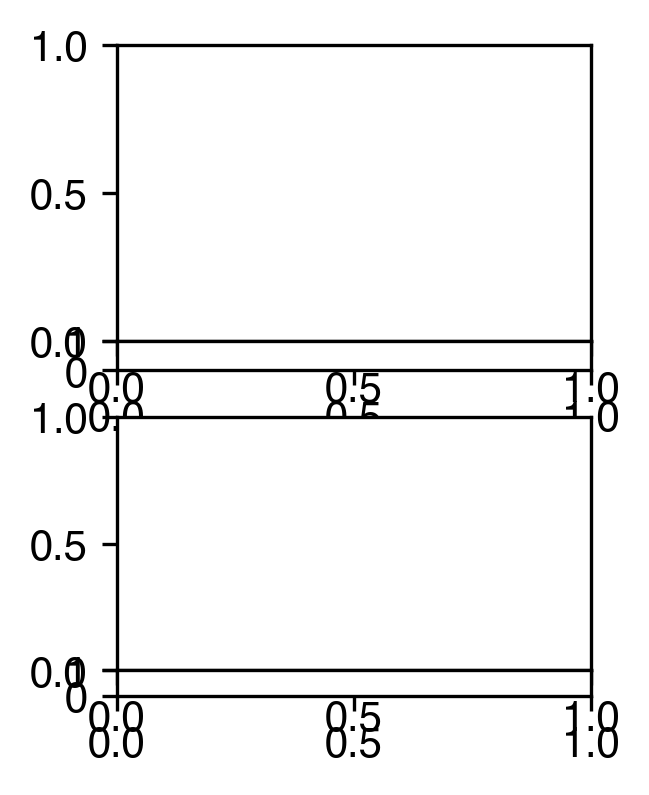

In [9]:
# spikes 

t_e,i_e,t_i,i_i_m = np.load('results/output_spk_network/spikes_no_clusters.npy',allow_pickle=True)
no_clus_spks = {'st_e':t_e,'st_i':t_i,'i_e':i_e,'i_i_m':i_i_m}

t_e,i_e,t_i,i_i_m = np.load('results/output_spk_network/spikes_clusters.npy',allow_pickle=True)
clus_spks = {'st_e':t_e,'st_i':t_i,'i_e':i_e,'i_i_m':i_i_m}

sns.reset_orig() 
adjusted_dim =(7.9,3.1)
fig = plt.figure(figsize = adjusted_dim,dpi=300)#(10*1.5,7*1.3))
mosaic1 = [['A']]

# 
mosaic2 = [['R1'],
           ['R3']]
axs2 = fig.subplot_mosaic(mosaic2,       
    gridspec_kw={
        "bottom": 0.25+0.35,
        "top": 0.95,
        "left": 0.3,
        "right": 0.5,
        "wspace": 0.5,
        "hspace": 0.,
         "height_ratios":[1,.1]
    },
                        ) 
    
mosaic3 = [['R2'],
           ['R4']]
axs3 = fig.subplot_mosaic(mosaic3,       
    gridspec_kw={
        "bottom": 0.25,
        "top": 0.25+0.3,
        "left": 0.3,
        "right": 0.5,
        "wspace": 0.5,
        "hspace": 0.,
         "height_ratios":[1, .1,]
    },
                        ) 

axs5 = [axs4['P4'].inset_axes([0.3, 0.1, 0.65, 0.15]),
        axs4['P4'].inset_axes([0.3, 0.25, 0.65, 0.15]),
        axs4['P4'].inset_axes([0.3, 0.4, 0.65, 0.15]),
        axs4['P4'].inset_axes([0.3, 0.55, 0.65, 0.15]),
       ][::-1]
sns.reset_orig()


# Rasters
st_e = no_clus_spks['st_e']/1000
st_i = no_clus_spks['st_i']/1000
uid_e =no_clus_spks['i_e']
uid_i =no_clus_spks['i_i_m']

dotsize = 1.5#0.05
nbins = 150
axs2['R1'].plot(st_e,uid_e, '|', ms=dotsize,markeredgewidth=.3, alpha=0.5,color = gvars.colors["EXC"], rasterized=False)
axs2['R1'].plot(st_i,uid_i,  '|', ms=dotsize, markeredgewidth=.3,alpha=0.5,color = gvars.colors["INH"], rasterized=False)
axs2['R1'].set_xlim([2.000,2.500])
axs2['R1'].axis('off')
bin_size = 0.002
rate, bins = np.histogram(np.hstack([st_e,st_i]), np.arange(0,np.max(st_e),bin_size))
axs2['R3'].plot(bins[1:-1], rate[1:], color="grey", lw=0.7)
axs2['R3'].set_xlabel("Time (s)", labelpad=0.0)
axs2['R3'].set_ylim(0,200)
sns.despine(ax=axs2['R3'],left=1)
axs2['R3'].set_yticks([])
axs2['R3'].axis('off')
axs2['R3'].set_xlim([2.000,2.500])

st_e = clus_spks['st_e']/1000
st_i = clus_spks['st_i']/1000
uid_e =clus_spks['i_e']
uid_i =clus_spks['i_i_m']

axs3['R2'].plot(st_e,uid_e, '|', ms=dotsize,markeredgewidth=.3, alpha=0.5,color = gvars.colors["EXC"], rasterized=False)
axs3['R2'].plot(st_i,uid_i,  '|', ms=dotsize, markeredgewidth=.3, alpha=0.5,color = gvars.colors["INH"], rasterized=False)
axs3['R2'].set_xlim([2.000,2.500])
axs3['R2'].axis('off')


rate, bins = np.histogram(np.hstack([st_e,st_i]), np.arange(0,np.max(st_e),bin_size))
axs3['R4'].plot(bins[1:-1], rate[1:], color="grey", lw=0.7)
axs3['R4'].set_xlabel("Time (s)", labelpad=0.0)
axs3['R4'].set_ylim(0,200)

axs3['R4'].set_yticks([])
axs3['R4'].set_xlim([2.000,2.500])
axs3['R4'].axis('off')
sns.despine(ax=axs3['R4'],left=1)


In [10]:
x_pert_p = np.load('results/grid_w_noises_v6.npy',allow_pickle=1)

FileNotFoundError: [Errno 2] No such file or directory: 'results/grid_w_noises_v6.npy'

In [ ]:
# Plot parameters

#additional variablbes
plot_params= {
'alpha': 0.3, #error alpha
'linewidth': 2
}

## Helpers specific to this plot
def res_to_means(xx_res):
    """ return summaries helper"""
    divs = np.mean(xx_res,-1)
    divs_std = np.std(xx_res,-1)/np.sqrt(20)
    divs_std= divs_std[:,:]
    return divs,divs_std

def add_errorbars(noises, divs,divs_std,
                  colors,
                  ax=None,
                  plot_params=None):
    """ add error bars to the axes """
    for i,d in enumerate(divs):
        # axs['A'].errorbar(noises,d,divs_std[i],color=colors[i],fmt='-',capsize=3)
        ax.plot(noises[:],d[:],color=colors[i],**plot_params)#,linewidth=line_width)
        ax.fill_between(noises,d+divs_std[i],d-divs_std[i],color=colors[i],
                        linewidth=0,alpha=plot_params['alpha'])#**plot_params)#alpha=error_alpha)
    return None
def add_colorbar(cmap, ax=None):
    """add colorbar to a colored lines with specified cmap"""
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=1))
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    cbar = plt.colorbar(sm,cax=cax,fraction=0.05)
    cbar.ax.set_ylabel('Coupling')
    return None

In [ ]:
# set the grid
#customize size
na = np.array
import styling_funcs as style
size =  (style.two_col_size()[0],style.two_col_size()[1])
fig, axs = plt.subplot_mosaic([['E','F','G','H'],
                              ['A','B','C','D'],# wierd layout is for historic reasons
                              ],
                              constrained_layout=True,figsize =(7.8,2.5),#size,
                                 gridspec_kw={
        "hspace": .0,
        "wspace": .3
    },dpi=200)




y_labels = ['Balance ($B$)', 'Weigth \n Co-tuning ($CT_W$)','In Group \n Correlation','Betw. Group \n Correlation']
# x_labels = 'Noise'


# x_pert_p = np.load('results/grid_w_noises_DB_noAsseblies_v6.npy',allow_pickle=1)
# grid_w_noises_DB_v6_assemblies
x_pert_p = np.load('results/grid_w_noises_DB_v6.npy',allow_pickle=1)
n_rep_internal =20
ws = na([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, ])#np.linspace(0.2,1,10) #V5
noises = np.linspace(0.01,1.,12)

xx_res1 = np.reshape(x_pert_p[:,5],(len(ws),len(noises),n_rep_internal))
xx_res2 = np.reshape(x_pert_p[:,6],(len(ws),len(noises),n_rep_internal))
noises = np.linspace(0.01,1.,12)
divs , divs_std = res_to_means(xx_res1) # get the summary and error


# set colormap    
cmap =ListedColormap(sns.color_palette('rocket_r',n_colors=12))
colors =sns.color_palette('rocket_r',n_colors=12)
#Add errorbars

add_errorbars(noises,divs,divs_std,colors,ax=axs['A'],plot_params=plot_params)
add_colorbar(cmap,ax=axs['A'])
axs['A'].set_ylim(0,1.1)
axs['A'].spines['left'].set_color(gvars.colors["tuning"])  
axs['A'].set_xlabel('noise')
axs['A'].set_ylabel(y_labels[0],color = gvars.colors["tuning"])
axs['A'].tick_params(axis = 'y',color= gvars.colors["tuning"])

sns.despine(offset=5,ax=axs['A'])

colors =sns.color_palette('crest',n_colors=12)

divs , divs_std = res_to_means(xx_res2) # get the summary and error
add_errorbars(noises,divs,divs_std,colors,ax=axs['B'],plot_params=plot_params)

axs['B'].spines['left'].set_color(gvars.colors["diversity"])    
axs['B'].set_ylim(-.1,1.1)

cmap =ListedColormap(sns.color_palette('crest',n_colors=12))
add_colorbar(cmap,ax=axs['B'])

axs['B'].set_xlabel('noise')
axs['B'].set_ylabel(y_labels[1],color=gvars.colors["diversity"])
axs['B'].tick_params(axis = 'y',color= gvars.colors["diversity"])
# axs['B'].ticklabel_format(axis = 'y',color= gvars.colors["diversity"])
plt.setp(axs['B'].get_yticklabels(), color=gvars.colors["diversity"])
sns.despine(offset=5,ax=axs['B'])

# 
### =========================Assemblies ================

x_pert_p = np.load('results/grid_w_noises_DB_v6_assemblies.npy',allow_pickle=1)
# theta1 =   np.load('results/grid_w_noises_DB_params_noAsseblies_v1.npy',allow_pickle=1)
n_rep_internal =20
ws = na([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, ])#np.linspace(0.2,1,10) #V5
xx_res1 = np.reshape(x_pert_p[:,5],(len(ws),len(noises),n_rep_internal))
xx_res2 = np.reshape(x_pert_p[:,6],(len(ws),len(noises),n_rep_internal))
noises = np.linspace(0.01,1.,12)

colors =sns.color_palette('rocket_r',n_colors=12)
divs , divs_std = res_to_means(xx_res1) # get the summary and error
#set the colorbar
cmap =ListedColormap(sns.color_palette('rocket_r',n_colors=12))
add_colorbar(cmap,ax=axs['C'])
add_errorbars(noises,divs,divs_std,colors,ax=axs['C'],plot_params=plot_params)

#set y-axis
axs['C'].set_ylim(0,1.1)
axs['C'].spines['left'].set_color(gvars.colors["tuning"])  
axs['C'].set_xlabel('noise')
axs['C'].set_ylabel(y_labels[0],color = gvars.colors["tuning"])
axs['C'].tick_params(axis = 'y',color= gvars.colors["tuning"])
sns.despine(offset=5,ax=axs['C'])

#Colormaps
colors =sns.color_palette('crest',n_colors=12)[:]
cmap =ListedColormap(sns.color_palette('crest',n_colors=12))

divs , divs_std = res_to_means(xx_res2) # get the summary and error
add_errorbars(noises,divs,divs_std,colors,ax=axs['D'],plot_params=plot_params)
axs['D'].spines['left'].set_color(gvars.colors["diversity"])    
axs['D'].set_ylim(-0.1,1.1)

add_colorbar(cmap,ax=axs['D'])
axs['D'].set_xlabel('noise')
axs['D'].set_ylabel(y_labels[1],color=gvars.colors["diversity"])
axs['D'].tick_params(axis = 'y',color= gvars.colors["diversity"])
sns.despine(offset=5,ax=axs['D'])
# plt.savefig('results/figs/grid_Fig3.pdf')
# 








### =========================CORRELATIONS ================
### =========================No Assemblies ================
x_pert_p = np.load('results/grid_w_noises_DB_v6.npy',allow_pickle=1)
# x_pert_p = np.load('results/grid_w_noises_DB_params_noAsseblies_v1.npy',allow_pickle=1)
n_rep_internal = 20
ws = na([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, ])#np.linspace(0.2,1,10) #V5
xx_res1 = np.reshape(x_pert_p[:,0],(len(ws),len(noises),n_rep_internal))
xx_res2 = np.reshape(np.mean(x_pert_p[:,1:4],1),(len(ws),len(noises),n_rep_internal))
noises = np.linspace(0.01,1.,12)
# ws = np.linspace(0.2,4,12) #for the old veriosn!!!
# ws = np.linspace(0.2,4,12) #for the old veriosn!!!

# noises = np.linspace(0.01,1.,12)
divs , divs_std = res_to_means(xx_res1) # get the summary and error
# set colormap
cmap =ListedColormap(sns.color_palette('Oranges_d',n_colors=12))
colors =sns.color_palette('Oranges_d',n_colors=12)

#Add errorbars
add_errorbars(noises,divs,divs_std,colors,ax=axs['E'],plot_params=plot_params)
add_colorbar(cmap,ax=axs['E'])

axs['E'].set_ylim(0,1.1)
# axs['A'].spines['left'].set_color(gvars.colors["EI_IN"])  
axs['E'].set_xlabel('noise')
axs['E'].set_ylabel(y_labels[2],color = 'k')#gvars.colors["EI_IN"])
# axs['A'].tick_params(axis = 'y',color= gvars.colors["EI_IN"])
# cmap =ListedColormap(sns.color_palette('Oranges_d',n_colors=12))
add_colorbar(cmap,ax=axs['E'])

sns.despine(offset=5,ax=axs['E'])




colors =sns.color_palette('Blues_d',n_colors=12)

divs , divs_std = res_to_means(xx_res2) # get the summary and error
add_errorbars(noises,divs,divs_std,colors,ax=axs['F'],plot_params=plot_params)

# axs['A'].spines['left'].set_color(gvars.colors["EI_OUT"])    
axs['F'].set_ylim(-.1,1.1)

cmap =ListedColormap(sns.color_palette('Blues_d',n_colors=12))
add_colorbar(cmap,ax=axs['F'])

axs['F'].set_xlabel('noise')
axs['F'].set_ylabel(y_labels[3],color=gvars.colors["EI_OUT"])
# axs['B'].tick_params(axis = 'Between-group correlation',color= gvars.colors["EI_OUT"])
# axs['B'].ticklabel_format(axis = 'y',color= gvars.colors["diversity"])
# plt.setp(axs['B'].get_yticklabels(), color=gvars.colors["EI_OUT"])
sns.despine(offset=5,ax=axs['F'])

# 
### =========================Assemblies ================

x_pert_p = np.load('results/grid_w_noises_DB_v6_assemblies.npy',allow_pickle=1)
# theta1 =   np.load('results/grid_w_noises_DB_params_noAsseblies_v1.npy',allow_pickle=1)
n_rep_internal =20
xx_res1 = np.reshape(x_pert_p[:,0],(len(ws),len(noises),n_rep_internal))
xx_res2 = np.reshape(np.mean(x_pert_p[:,1:4],1),(len(ws),len(noises),n_rep_internal))
noises = np.linspace(0.01,1.,12)

colors =sns.color_palette('Oranges_d',n_colors=12)
divs , divs_std = res_to_means(xx_res1) # get the summary and error
#set the colorbar
cmap =ListedColormap(sns.color_palette('Oranges_d',n_colors=12))
add_colorbar(cmap,ax=axs['G'])
add_errorbars(noises,divs,divs_std,colors,ax=axs['G'],plot_params=plot_params)

#set y-axis
axs['G'].set_ylim(0,1.1)
# axs['C'].spines['left'].set_color(gvars.colors["EI_IN"])  
axs['G'].set_xlabel('noise')
# axs['C'].set_ylabel('Balance',color = gvars.colors["EI_IN"])
axs['G'].set_ylabel(y_labels[2],color = 'k')
# axs['C'].tick_params(axis = 'y',color= gvars.colors["EI_IN"])
sns.despine(offset=5,ax=axs['G'])

#Colormaps
colors =sns.color_palette('Blues_d',n_colors=12)[:]
cmap =ListedColormap(sns.color_palette('Blues_d',n_colors=12))

divs , divs_std = res_to_means(xx_res2) # get the summary and error
add_errorbars(noises,divs,divs_std,colors,ax=axs['H'],plot_params=plot_params)
# axs['C'].spines['left'].set_color(gvars.colors["EI_OUT"])    
axs['H'].set_ylim(-0.1,1.1)

add_colorbar(cmap,ax=axs['H'])
axs['H'].set_xlabel('noise')
axs['H'].set_ylabel(y_labels[3])#,#color=gvars.colors["EI_OUT"])
# axs['C'].tick_params(axis = 'y',color= gvars.colors["EI_OUT"])
sns.despine(offset=5,ax=axs['H'])
# plt.savefig('results/figs/grid_Fig3_with_correlations.pdf')
# 


In [ ]:
sns.set_context('talk')
colors = sns.color_palette('Reds',n_colors = len(ps))
for i,posterior in enumerate(posteriors):
    # posterior = posteriors[1]
    eps = [e['epsilon'] for e in posterior]
    # last_valid_ind = 
    plt.plot(eps,'-o',label=ps[i],color=colors[i])
    plt.yscale('log')
plt.ylabel('loss')
# plt.axhline(5.2451693006271e-06
# )
# plt.axhline(0.008601205072314138)
plt.xlabel('PMC steps')
plt.legend()
    
sns.despine()

In [ ]:
sns.set_context('talk')
colors = sns.color_palette('Reds',n_colors = len(ps))
for i,posterior in enumerate(posteriors):
    # posterior = posteriors[1]
    eps = [e['epsilon'] for e in posterior]
    # last_valid_ind = 
    plt.plot(eps,'-o',label=ps[i],color=colors[i])
    plt.yscale('log')
plt.ylabel('loss')
# plt.axhline(5.2451693006271e-06
# )
# plt.axhline(0.008601205072314138)
plt.xlabel('PMC steps')
plt.legend()
    
sns.despine()

In [ ]:
na= np.array
sns.set_context('talk')
colors = sns.color_palette('Reds',n_colors = len(ps))
for i,posterior in enumerate(posteriors):
    # posterior = posteriors[1]
    nac = na([e['n accepted'] for e in posterior])
    dtot = na([e['n total'] for e in posterior])
    
    # last_valid_ind = 
    plt.plot(nac/dtot,'-o',label=ps[i],color=colors[i])
    # plt.yscale('log')
plt.ylabel('Acceptance Rate')
# plt.axhline(5.2451693006271e-06
# )
# plt.axhline(0.008601205072314138)
plt.xlabel('PMC steps')
plt.legend()
    
sns.despine()

In [ ]:
# nac = #[posterior[-1]['n accepted'] for posterior in posteriors0][0]
dtot = [posterior[-1]['n total'] for posterior in posteriors0][0]
nac/dtot
# nac

plt.plot(dacc[0]);

In [ ]:
# posteriors0 =[np.load('results/ABC_p=%s_v1_4par.npy'%p,allow_pickle=1) for p in ps]
posteriors =[np.load('results/ABC_p=%s_v1_4par_cont.npy'%p,allow_pickle=1) for p in ps]


In [ ]:
MAPs = [getMAP(posterior[-1]['theta accepted'],[5.,5.,5.,5]) for posterior in posteriors]

In [ ]:
MAPs

In [ ]:
MAPs

In [ ]:
MAPs= getMAP(posteriors[0][-1]['theta accepted'],[10,10,0,0])

In [ ]:
min_set = [1.,1.,1.,0.]#, 0.1,0.01]
max_set = [15.,15.,15., 15.]#,20.,1.0]
# ,posteriors[-1][-1]['theta accepted'].T
# samples = [posterior[32]['theta accepted'].T for posterior in posteriors]

# for i in range(1,30,3):
samples = [posterior[-1]['theta accepted'].T for posterior in posteriors]
# sampls[0]=sampls[0][0]
_ = analysis.pairplot(samples,#[0],training_set[0][0][valid_samples[0],:]], #theta[mask]]
                    upper ='scatter',#upper=['hist','contour','contour'],
                    diag='kde',#diag= ['hist','hist','hist'],
                    limits=np.vstack([min_set,max_set]).T, 
                    points = MAPs,
                    # points_colors= ['r','C2'],
                    s = 0.1,
                    figsize=(10,10))

In [ ]:
min_set = [1.,1.,1.,1.]#, 0.1,0.01]
max_set = [15.,15.,15., 15.]#,20.,1.0]
# ,posteriors[-1][-1]['theta accepted'].T
# samples = [posterior[32]['theta accepted'].T for posterior in posteriors]

# for i in range(1,30,3):
samples = [posterior[-1]['theta accepted'].T for posterior in posteriors]
# sampls[0]=sampls[0][0]
_ = analysis.pairplot(samples,#[0],training_set[0][0][valid_samples[0],:]], #theta[mask]]
                    upper ='scatter',#upper=['hist','contour','contour'],
                    diag='kde',#diag= ['hist','hist','hist'],
                    limits=np.vstack([min_set,max_set]).T, 
                    # points = MAPs,
                    # points_colors= ['r','C2'],
                    s = 0.1,
                    figsize=(10,10))

In [ ]:
min_set = [1.,1.,1.,1.]#, 0.1,0.01]
max_set = [15.,15.,15., 15.]#,20.,1.0]
# ,posteriors[-1][-1]['theta accepted'].T
# samples = [posterior[32]['theta accepted'].T for posterior in posteriors]
sampls = []
# for i in range(1,30,3):
samples = [posterior[-1]['theta accepted'].T for posterior in posteriors0]
sampls.append(samples[0])
samples = [posterior[-1]['theta accepted'].T for posterior in posteriors]
sampls.append(samples[0])
    # sampls.append(samples[0])

# sampls[0]=sampls[0][0]
_ = analysis.pairplot(sampls,#[0],training_set[0][0][valid_samples[0],:]], #theta[mask]]
                    upper ='scatter',#upper=['hist','contour','contour'],
                    diag='kde',#diag= ['hist','hist','hist'],
                    limits=np.vstack([min_set,max_set]).T, 
                    points = MAPs,
                    # points_colors= ['r','C2'],
                    s = 0.1,
                    figsize=(10,10))

In [ ]:
float(1/.1)*8.5

In [ ]:
MAPs

In [ ]:
%history -g -f 'hist'

In [ ]:
[c for c in %history if c.startswith('MAPs=')]

In [ ]:
# plt.yabel()
plt.figure()
colors = sns.color_palette('Reds',n_colors = len(ps))
plt.figure(figsize=(3,6))
for i in range(4):
    plt.subplot(4,1,i+1)
    for p_i,p in enumerate(ps):
        sns.kdeplot(samples[p_i][:,i],color=colors[p_i],bw_method=0.5)
        plt.xlim(1,15)
        # plt.ylim(0,0.3)
        if p_i<len(ps):
            sns.despine(left=1)
            plt.yticks([])
            # plt.xticks([])
            plt.ylabel('')
            # plt.axis('off')
        # else:
            # sns.despine(left=1)

plt.xlabel('Assembly Stength')
#legend

# plt.xticks(np.arange(20))
plt.tight_layout()

In [ ]:
plt.plot(samples[0][:,-1])

In [ ]:
samples = [posterior[-1]['theta accepted'].T for posterior in posteriors]
j = 0
colors = sns.color_palette('Set1',n_colors=4)
# colors = sns.color_palette('Reds',n_colors = len(ps))

labels = ['R_{EE}','R_{EI}','R_{IE}','R_{II}']
for j in range(len(ps)):
    for i in range(4):
        # plt.plot(ps[i],[MAPs[i]],'o-')
        # samples= posteriors[0][-1]['theta accepted'].T
        plt.errorbar(ps[j],samples[j][:,i].mean(0),samples[j][:,i].std(0),
                     fmt='o-',capsize=10,color = colors[i],label=labels[i])
        # if j==0:
            # plt.legend()            
plt.ylabel('R')
plt.xlabel('p')
sns.despine()


In [ ]:
len(ps)

In [ ]:
MAPs

In [ ]:
MAPs

In [ ]:
def reshape_arrays(db_collected,db_null_collected,db_full_collected):
    db_collected=db_collected[0].numpy()
    db_collected= db_collected.reshape((5,20,7))
    db_null_collected=db_null_collected[0].numpy()
    db_null_collected= db_null_collected.reshape((5,20,7))
    db_full_collected=db_full_collected[0].numpy()
    db_full_collected= db_full_collected.reshape((5,20,7))
    return db_collected,db_null_collected,db_full_collected

db_collected,db_null_collected,db_full_collected = np.load('results/DB_ps_full_v4_s2n=0.2_woverp.npy',allow_pickle=True) #
db_collected,db_null_collected,db_full_collected = reshape_arrays(db_collected,db_null_collected,db_full_collected)
# db_collected2,db_null_collected2,db_full_collected2 = np.load('results/DB_ps_full_v3_s2n=0.1.npy',allow_pickle=True) #
# db_collected2,db_null_collected2,db_full_collected2 = reshape_arrays(db_collected2,db_null_collected2,db_full_collected2)
# # np.save('results/DB_ps_full_v4.npy',[db_collected,db_null_collected,db_full_collected]) #






In [ ]:
plt.plot(db_full_collected[0][:,6])
plt.plot(db_collected[0][:,6])
plt.plot(db_null_collected[0][:,6])

In [ ]:
3*torch.sum(synth_data[:,1:4]**2,1)

In [ ]:
synth_data[:,0]

In [ ]:

synth_data = db_full_collected[-1,:,:4]
x0 = synth_data[0,:]
loss = ((x0[0]-synth_data[:,0])**2)+(3*np.sum((x0[1:]-synth_data[:,1:4])**2,1))/10
print(np.mean(loss))

In [ ]:
(x0[0]-synth_data[:,0]**2)

In [ ]:
ps = [0.1]
sns.set_context('poster')
plt.figure()
# plt.subplot(1,2,1)
na =np.array
plt.errorbar(ps,np.mean(db_collected[:,:,5],1),np.std(db_collected[:,:,5],1)/np.sqrt(20),fmt='-o',capsize=5,label='balance')
plt.errorbar(ps,np.mean(db_null_collected[:,:,5],1),np.std(db_null_collected[:,:,5],1)/np.sqrt(20),fmt='--^C0',capsize=5)

# plt.errorbar(na(ps)+0.05,np.mean(db_full_collected[:,:,5],1),np.std(db_full_collected[:,:,5],1),fmt='o--',capsize=5)
plt.ylabel('Balance,Diversity')
plt.xlabel('p')
# plt.subplot(1,2,2)
plt.errorbar(ps,np.mean(db_collected[:,:,6],1),np.std(db_collected[:,:,6],1)/np.sqrt(20),fmt='o',capsize=5,label='diversity')
plt.errorbar(ps,np.mean(db_null_collected[:,:,6],1),np.std(db_null_collected[:,:,6],1)/np.sqrt(20),fmt='--^C1',capsize=5)

# plt.errorbar(na(ps)+0.05,np.mean(db_full_collected2[:,:,6],1),np.std(db_full_collected2[:,:,6],1),fmt='-o',capsize=5)
# plt.errorbar(ps,np.mean(db_null_collected2[:,:,1],1),np.std(db_full_collected2[:,:,1],1),fmt='--o',capsize=5)
# plt.legend()
# plt.errorbar(ps,np.mean(db_full_collected2[:,:,5],1),np.std(db_full_collected2[:,:,5],1),fmt='-o',capsize=5)
# plt.plot(ps,np.mean(db_null_collected2[:,:,6],1),'--o')
# plt.errorbar(ps,np.mean(db_collected[:,:,6],1),np.std(db_collected[:,:,6],1),fmt='o',capsize=5)
sns.despine()

In [ ]:
ps = [0.1,0.25, 0.5,0.75, 0.95]
sns.set_context('poster')
plt.figure()
# plt.subplot(1,2,1)
na =np.array
plt.errorbar(ps,np.mean(db_collected[:,:,5],1),np.std(db_collected[:,:,5],1)/np.sqrt(20),fmt='-o',capsize=5,label='balance')
plt.errorbar(na(ps),np.mean(db_null_collected[:,:,5],1),np.std(db_full_collected[:,:,5],1)/np.sqrt(20),fmt='--oC0',capsize=5)

# plt.errorbar(na(ps)+0.05,np.mean(db_full_collected[:,:,5],1),np.std(db_full_collected[:,:,5],1),fmt='o--',capsize=5)
plt.ylabel('Balance,Diversity')
plt.xlabel('p')
# plt.subplot(1,2,2)
plt.errorbar(ps,np.mean(db_collected[:,:,6],1),np.std(db_collected[:,:,6],1)/np.sqrt(20),fmt='-',capsize=5,label='diversity')
plt.errorbar(ps,np.mean(db_null_collected[:,:,6],1),np.std(db_full_collected[:,:,6],1)/np.sqrt(20),fmt='--oC1',capsize=5)

# plt.errorbar(na(ps)+0.05,np.mean(db_full_collected2[:,:,6],1),np.std(db_full_collected2[:,:,6],1),fmt='-o',capsize=5)
# plt.errorbar(ps,np.mean(db_null_collected2[:,:,1],1),np.std(db_full_collected2[:,:,1],1),fmt='--o',capsize=5)
plt.legend()
# plt.errorbar(ps,np.mean(db_full_collected2[:,:,5],1),np.std(db_full_collected2[:,:,5],1),fmt='-o',capsize=5)
# plt.plot(ps,np.mean(db_null_collected2[:,:,6],1),'--o')
# plt.errorbar(ps,np.mean(db_collected[:,:,6],1),np.std(db_collected[:,:,6],1),fmt='o',capsize=5)
sns.despine()

In [ ]:
float(1/0.1)*2.5

In [ ]:
ps = [0.1,0.25,0.5,0.95]
sns.set_context('poster')
plt.figure()
# plt.subplot(1,2,1)
na =np.array
plt.errorbar(ps,np.mean(db_collected[1:,:,5],1),np.std(db_collected[1:,:,5],1),fmt='-o',capsize=5,label='balance')
plt.errorbar(na(ps),np.mean(db_null_collected[1:,:,5],1),np.std(db_null_collected[1:,:,5],1),fmt='--oC0',capsize=5)

# plt.errorbar(na(ps)+0.05,np.mean(db_full_collected[:,:,5],1),np.std(db_full_collected[:,:,5],1),fmt='o--',capsize=5)
plt.ylabel('Balance,Diversity')
plt.xlabel('p')
# plt.subplot(1,2,2)
plt.errorbar(ps,np.mean(db_collected[1:,:,6],1),np.std(db_collected[1:,:,6],1),fmt='-o',capsize=5,label='diversity')
plt.errorbar(ps,np.mean(db_null_collected[1:,:,6],1),np.std(db_null_collected[1:,:,6],1),fmt='--oC1',capsize=5)

# plt.errorbar(na(ps)+0.05,np.mean(db_full_collected2[:,:,6],1),np.std(db_full_collected2[:,:,6],1),fmt='-o',capsize=5)
# plt.errorbar(ps,np.mean(db_null_collected2[:,:,1],1),np.std(db_full_collected2[:,:,1],1),fmt='--o',capsize=5)
plt.legend()
# plt.errorbar(ps,np.mean(db_full_collected2[:,:,5],1),np.std(db_full_collected2[:,:,5],1),fmt='-o',capsize=5)
# plt.plot(ps,np.mean(db_null_collected2[:,:,6],1),'--o')
# plt.errorbar(ps,np.mean(db_collected[:,:,6],1),np.std(db_collected[:,:,6],1),fmt='o',capsize=5)
sns.despine()

In [ ]:
ps = [0.1,0.25,0.5,0.95]

plt.figure()
# plt.subplot(1,2,1)
na =np.array
plt.errorbar(ps,np.mean(db_collected[1:,:,5],1),np.std(db_collected[1:,:,5],1),fmt='-o',capsize=5,label='balance')
plt.errorbar(na(ps),np.mean(db_null_collected[1:,:,5],1),np.std(db_null_collected[1:,:,5],1),fmt='--oC0',capsize=5)

# plt.errorbar(na(ps)+0.05,np.mean(db_full_collected[:,:,5],1),np.std(db_full_collected[:,:,5],1),fmt='o--',capsize=5)
plt.ylabel('Balance,Diversity')
plt.xlabel('p')
# plt.subplot(1,2,2)
plt.errorbar(ps,np.mean(db_collected[1:,:,6],1),np.std(db_collected[1:,:,6],1),fmt='-o',capsize=5,label='diversity')
plt.errorbar(ps,np.mean(db_null_collected[1:,:,6],1),np.std(db_null_collected[1:,:,6],1),fmt='--oC1',capsize=5)

# plt.errorbar(na(ps)+0.05,np.mean(db_full_collected2[:,:,6],1),np.std(db_full_collected2[:,:,6],1),fmt='-o',capsize=5)
# plt.errorbar(ps,np.mean(db_null_collected2[:,:,1],1),np.std(db_full_collected2[:,:,1],1),fmt='--o',capsize=5)
plt.legend()
# plt.errorbar(ps,np.mean(db_full_collected2[:,:,5],1),np.std(db_full_collected2[:,:,5],1),fmt='-o',capsize=5)
# plt.plot(ps,np.mean(db_null_collected2[:,:,6],1),'--o')
# plt.errorbar(ps,np.mean(db_collected[:,:,6],1),np.std(db_collected[:,:,6],1),fmt='o',capsize=5)
sns.despine()

In [ ]:
ps = [0.1,0.25,0.5,0.75,0.95]

plt.figure()
# plt.subplot(1,2,1)
na =np.array
plt.errorbar(ps,np.mean(db_collected[:,:,5],1),np.std(db_collected[:,:,5],1),fmt='-o',capsize=5,label='balance')
plt.errorbar(na(ps),np.mean(db_full_collected[:,:,5],1),np.std(db_collected[:,:,5],1),fmt='--oC0',capsize=5)

# plt.errorbar(na(ps)+0.05,np.mean(db_full_collected[:,:,5],1),np.std(db_full_collected[:,:,5],1),fmt='o--',capsize=5)
plt.ylabel('Balance,Diversity')
plt.xlabel('p')
# plt.subplot(1,2,2)
plt.errorbar(ps,np.mean(db_collected[:,:,6],1),np.std(db_collected[:,:,6],1),fmt='-o',capsize=5,label='diversity')
plt.errorbar(ps,np.mean(db_full_collected[:,:,6],1),np.std(db_collected[:,:,6],1),fmt='--oC1',capsize=5)

# plt.errorbar(na(ps)+0.05,np.mean(db_full_collected2[:,:,6],1),np.std(db_full_collected2[:,:,6],1),fmt='-o',capsize=5)
# plt.errorbar(ps,np.mean(db_null_collected2[:,:,1],1),np.std(db_full_collected2[:,:,1],1),fmt='--o',capsize=5)
plt.legend()
# plt.errorbar(ps,np.mean(db_full_collected2[:,:,5],1),np.std(db_full_collected2[:,:,5],1),fmt='-o',capsize=5)
# plt.plot(ps,np.mean(db_null_collected2[:,:,6],1),'--o')
# plt.errorbar(ps,np.mean(db_collected[:,:,6],1),np.std(db_collected[:,:,6],1),fmt='o',capsize=5)
sns.despine()

In [ ]:
clear_cache('cython')


In [ ]:
plt.title('p=0.1')
plt.subplot(1,2,1)
plt.violinplot(db_null_collected[0][:,5].numpy(),positions=(0,))
plt.violinplot(db_full_collected[0][:,5].numpy(),positions=(1,))
plt.violinplot(db_collected[0][:5,5].numpy(),positions=(2,))
plt.ylim(0,1)
plt.xticks([0,1,2],['no','naive','MAP'])
plt.ylabel('B')
plt.subplot(1,2,2)
plt.violinplot(db_null_collected[0][:,6].numpy(),positions=(0,))
plt.violinplot(db_full_collected[0][:,6].numpy(),positions=(1,))
plt.violinplot(db_collected[0][:5,6].numpy(),positions=(2,))
# plt.plot(db_full_collected[0][:,6],'o')
# plt.plot(db_collected[0][:5,6],'or')
plt.xticks([0,1,2],['no','naive','MAP'])
sns.despine()
plt.ylim(0,1)

plt.ylabel('D')
plt.tight_layout()

## Perturbations 

In [ ]:

# Chech the perturbations
colors= ['C0','C1','C2','C3','C4','C5']

x_pert_p = np.load('results/perturbations_v5.npy',allow_pickle=1)
dR= np.load('results/perturbations_dR_v5.npy',allow_pickle=1)
theta1 = np.load('results/perturbations_params_v5.npy',allow_pickle=1)
n_rep = 20
plt.figure(figsize=(7,3))
for i in [0,1,2]:#range(6):
  # for j in range(4):
    plt.subplot(1,2,1)
    # plt.axhline(0.94)
    xx_res = np.reshape(x_pert_p[i][:,5], [len(dR),n_rep])
    # plt.violinplot(xx_res)
    plt.errorbar(dR,np.mean(xx_res[:,:],1),np.std(xx_res[:,:],1),fmt='-o',capsize= 5)
    plt.ylim(-.1,1.2)
    # plt.axvline(0,color='k')
    sns.despine()
    plt.xlabel('$dR$')
plt.ylabel('Correlation')


for i in [0,1,2]:#range(6):
    # for j in range(4):
    plt.subplot(1,2,2)
    # plt.axhline(0.94)
    # xx_res = np.reshape(x_pert_p[i].numpy(), [10,5,5])
#     xx_res = np.reshape(x_pert_p[i].numpy(), [len(dR),n_rep,4])
    # xx_res = np.reshape(x_pert_p[i][:,6], [len(dR),n_rep,1])
    xx_res = np.reshape(x_pert_p[i][:,6], [len(dR),n_rep])
    # plt.violinplot(xx_res)
#     xx_avg = np.mean(xx_res[:,:,1:4],2)
    plt.errorbar(dR,np.mean(xx_res[:,:],1),np.std(xx_res[:,:],1),
                 fmt='-o',capsize =5,color=colors[i],label='p=%s'%ps[i])
    plt.ylim(-.1,1.1)
    sns.despine()
    # plt.axvline(0,color='k')
plt.xlabel('$dR$')
# plt.legend()

plt.tight_layout()


In [ ]:
colors= ['C0','C1','C2','C3','C4','C5']
ps =[0.05, 0.1, 0.25, 0.5, 0.75,0.95] #[0.95,0.75,0.5,0.25]
x_pert_p = np.load('results/perturbations_v8.npy',allow_pickle=1)
dR= np.load('results/perturbations_dR_v8.npy',allow_pickle=1)
theta1 = np.load('results/perturbations_params_v8.npy',allow_pickle=1)

In [ ]:
tt =np.reshape(theta1[:,0],(5,10,5))

In [ ]:
tt[0,0,:]

In [ ]:
np.reshape(x_pert_p[0,:,6],[])

In [ ]:
plt.plot(x_pert_p[0,:,5],x_pert_p[0,:,6],'o')
# plt.xlim(0,40)

In [ ]:
mean_b = np.mean(xx_res1[:,:,:],-1)
mean_d = np.mean(xx_res2[:,:,:],-1)

np.where(mean_d>0.8)

In [ ]:
np.where(x_pert_p[0,:,6]>0.8)

In [ ]:
x_pert_p[0,54:60,5:7]

In [ ]:
x_pert_p[0,54:60,:4]

In [ ]:
x_pert_p[0,54:60,5:]

In [ ]:
theta1[0][55:60,:]

In [ ]:
colors= ['C0','C1','C2','C3','C4','C5']
ps =[0.05, 0.1, 0.25, 0.5, 0.75,0.95] #[0.95,0.75,0.5,0.25]
x_pert_p = np.load('results/perturbations_v8.npy',allow_pickle=1)
dR= np.load('results/perturbations_dR_v8.npy',allow_pickle=1)
theta1 = np.load('results/perturbations_params_v8.npy',allow_pickle=1)

%matplotlib inline
plt.figure()
colors = sns.color_palette('Reds',n_colors=len(x_pert_p))
for i,x_pert in enumerate(x_pert_p):
    xx_res1 = np.reshape(x_pert[:,5],(5,20,10))
    xx_res2 = np.reshape(x_pert[:,6],(5,20,10))
    gs = np.reshape(x_pert[:,4],(5,20,10))
    # xx_res1[gs>1.4] = np.nan
    # xx_res2[gs>1.4] = np.nan
    
    # xx_res1/=np.nanmean(xx_res1[0,:,:])
    # xx_res2/=np.nanmean(xx_res2[0,:,:])
    
    plt.subplot(1,2,1)
    plt.errorbar(dR,np.nanmean(np.mean(xx_res1[:,:,:],-1),-1),
             np.std(np.nanmean(xx_res1[:,:,:],-1),-1)/np.sqrt(20),
             fmt='-o',color=colors[i],capsize=5)
    plt.ylabel('B')
    # plt.ylim(0,1.1)
    plt.subplot(1,2,2)
    plt.errorbar(dR,np.nanmean(np.nanmean(xx_res2[:,:,:],-1),-1),
             np.std(np.nanmean(xx_res2[:,:,:],-1),-1)/np.sqrt(20),
             fmt='-o',color=colors[i],capsize=5)
    plt.ylabel('D')
    plt.ylim(0,1.1)
sns.despine()
plt.tight_layout()

In [ ]:
colors= ['C0','C1','C2','C3','C4','C5']
ps =[0.05, 0.1, 0.25, 0.5, 0.75,0.95] #[0.95,0.75,0.5,0.25]
map_per_p = [
 na([10.94370168, 10.38550318,  5.84189538,  5.64140936])]
x_pert_p = np.load('results/perturbations-R_v3.npy',allow_pickle=1)
dR=        np.load('results/perturbations-R_dR_v3.npy',allow_pickle=1)
theta1 =   np.load('results/perturbations-R_params_v3.npy',allow_pickle=1)
n_rep_internal = 20
xx_res1 = np.reshape(x_pert_p[0][:,5],(4,10,n_rep_internal))
xx_res2 = np.reshape(x_pert_p[0][:,6],(4,10,n_rep_internal))


xx_res22 = np.reshape(x_pert_p[0][:,0],(4,10,n_rep_internal))
xx_res23 = np.reshape(x_pert_p[0][:,1],(4,10,n_rep_internal))
xx_res24 = np.reshape(x_pert_p[0][:,2],(4,10,n_rep_internal))
xx_res25 = np.reshape(x_pert_p[0][:,3],(4,10,n_rep_internal))


# xx_res3 = np.reshape(x_pert_p[0][:,4],(4,10,n_rep_internal))

# %matplotlib inline
# plt.figure()
# colors = sns.color_palette('Reds',n_colors=len(x_pert_p))
# for i,x_pert in enumerate(x_pert_p):
#     xx_res1 = np.reshape(x_pert[:,5],(5,20,10))
#     xx_res2 = np.reshape(x_pert[:,6],(5,20,10))
#     gs = np.reshape(x_pert[:,4],(5,20,10))
#     # xx_res1[gs>1.4] = np.nan
#     # xx_res2[gs>1.4] = np.nan
    
#     # xx_res1/=np.nanmean(xx_res1[0,:,:])
#     # xx_res2/=np.nanmean(xx_res2[0,:,:])
    
#     plt.subplot(1,2,1)
#     plt.errorbar(dR,np.nanmean(np.mean(xx_res1[:,:,:],-1),-1),
#              np.std(np.nanmean(xx_res1[:,:,:],-1),-1)/np.sqrt(20),
#              fmt='-o',color=colors[i],capsize=5)
#     plt.ylabel('B')
#     # plt.ylim(0,1.1)
#     plt.subplot(1,2,2)
#     plt.errorbar(dR,np.nanmean(np.nanmean(xx_res2[:,:,:],-1),-1),
#              np.std(np.nanmean(xx_res2[:,:,:],-1),-1)/np.sqrt(20),
#              fmt='-o',color=colors[i],capsize=5)
#     plt.ylabel('D')
#     plt.ylim(0,1.1)
# sns.despine()
# plt.tight_layout()

In [ ]:

# plt.figure(figsize=(3,6))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.axvline(MAPs[0][i],color='r')
    plt.errorbar(dR,np.mean(xx_res1[i,:,:],-1),np.std(xx_res1[i,:,:],-1),fmt='-o',capsize=4)
    # plt.errorbar(dR,np.mean(xx_res2[i,:,:],-1),np.std(xx_res2[i,:,:],-1),fmt='-o',capsize=4)
    
    # plt.errorbar(dR,np.mean(xx_res22[i,:,:],-1),np.std(xx_res23[i,:,:],-1),fmt='-o',capsize=4)
    plt.errorbar(dR,np.mean(xx_res2[i,:,:],-1),np.std(xx_res2[i,:,:],-1),fmt='-o',capsize=4)
    # plt.errorbar(dR,np.mean(xx_res3[i,:,:],-1),np.std(xx_res3[i,:,:],-1),fmt='-o',capsize=4)
    # plt.axvline(3.6)
    plt.xlabel('R')
    
    plt.ylim(-0.1,1.1)
    # plt.title()
plt.tight_layout()

In [ ]:

# plt.figure(figsize=(3,6))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.axvline(map_per_p[0][i],color='r')
    plt.errorbar(dR,np.mean(xx_res1[i,:,:],-1),np.std(xx_res1[i,:,:],-1),fmt='-o',capsize=4)
    # plt.errorbar(dR,np.mean(xx_res2[i,:,:],-1),np.std(xx_res2[i,:,:],-1),fmt='-o',capsize=4)
    
    # plt.errorbar(dR,np.mean(xx_res22[i,:,:],-1),np.std(xx_res23[i,:,:],-1),fmt='-o',capsize=4)
    plt.errorbar(dR,np.mean(xx_res2[i,:,:],-1),np.std(xx_res2[i,:,:],-1),fmt='-o',capsize=4)
    # plt.errorbar(dR,np.mean(xx_res3[i,:,:],-1),np.std(xx_res3[i,:,:],-1),fmt='-o',capsize=4)
    plt.axvline(3.6)
    plt.xlabel('R')
    
    plt.ylim(-0.1,1.1)
    # plt.title()
plt.tight_layout()

In [ ]:
gvars.colors

In [ ]:
import seaborn as sns
import global_vars as gvars
# set the grid
                        # ['R1r1 ','R1r0 ','R2r1 ','B'],
                        # ['R1r2 ','R1','R2','R2r2 '],
                        # ['R3r1 ','R3','R4','R4r1 '],
fig, axs = plt.subplot_mosaic([
                            ['R1'   , 'R2',  'R3',     'R4'],
                            ['R1r1 ','R2r1 ','R3r1 ','R4r1 '],
                            ['R1r2 ','R2r2 ','R3r2 ','R1r0 '],
                              ],
                              constrained_layout=True,figsize = style.two_col_size(),
                                 gridspec_kw={
        "hspace": 0.,
        "wspace": .2
    },)


# plt.figure(figsize=(3,6))
shades = [[[0,6.5],[7,10]],
         [[0,1]],
         [[0,5]],
          [[0,0]],
         ];

shade_colors =[[['r'],['C0']],
         [['C1']],
         [['C4']],
          [['C5']],
         ];



for i in range(4):

    axs['R%s'%(i+1)].axvline(map_per_p[0][i],color='k',linestyle='--')
    # axs['R%s'%(i+1)].axvline(3.8,color='r',linestyle='-')
    xx_res1[xx_res1<0] = 0
    axs['R%s'%(i+1)].errorbar(dR,np.mean(xx_res1[i,:,:],-1),np.std(xx_res1[i,:,:],-1),color = gvars.colors["tuning"],
                              fmt='o',capsize=4)
    # plt.errorbar(dR,np.mean(xx_res2[i,:,:],-1),np.std(xx_res2[i,:,:],-1),fmt='-o',capsize=4)
    
    # plt.errorbar(dR,np.mean(xx_res22[i,:,:],-1),np.std(xx_res23[i,:,:],-1),fmt='-o',capsize=4)
    axs['R%s'%(i+1)].errorbar(dR,np.mean(xx_res2[i,:,:],-1),np.std(xx_res2[i,:,:],-1),color= gvars.colors["diversity"],
                              fmt='o',capsize=4)
    # plt.errorbar(dR,np.mean(xx_res3[i,:,:],-1),np.std(xx_res3[i,:,:],-1),fmt='-o',capsize=4)
    
    shaded_a  =shades[i]
    shade_color = shade_colors[i]
    
    [axs['R%s'%(i+1)].axvspan(x[0], x[1], color=shade_color[kk][0], alpha=0.05, lw=0) for kk,x in enumerate(shaded_a)]
    if i>=2:
        axs['R%s'%(i+1)].set_xlabel('Assembly strength')
    
    # axs['R'%i+1].setxlabel('R')
    
    axs['R%s'%(i+1)].set_ylim(-.1,1.1)
    # plt.title()
    sns.despine(ax=axs['R%s'%(i+1)])
    
    
    
##
def RGB(x, y, z):
    return [x/255, y/255, z/255]
raster_names = ['R1r0 ','R1r1 ','R1r2 ',
               'R2r1 ',               'R2r2 ',#'R4r2 ',
               'R3r1 ','R3r2 ',
               'R4r1 ','R1r2 ']#sti,gdi




# 'R2r1  -  R1=1.3
# 'R2r  -  R1=3.3
# R3r1 - R3=1.8
# R4r1 R4=1.6

for raster_name in raster_names:
    ste,gde,sti,gdi= np.load('/home/ovinogradov/Projects/recurrent-connectivity-plasticity/data/output_spk_network/%s.npy'%raster_name,allow_pickle=1)
    
    axs[raster_name].plot(ste,gde, '|', ms=.75, color = gvars.colors["EXC"],alpha=0.5, rasterized=True)
    axs[raster_name].plot(sti,gdi, '|', ms=.75, color =gvars.colors["INH"],alpha=0.5, rasterized=True)
    rate_e, bins = np.histogram(ste, bins=np.arange(0,10000,10))
    rate_i, bins = np.histogram(sti, bins=np.arange(0,10000,10))
    rate_e=200*rate_e/max(rate_e)
    rate_i=200*-rate_i/max(rate_i)
    rate_e-=250
    rate_i-=250
    
    axs[raster_name].plot(bins[1:],rate_e, gvars.colors["EXC"],alpha=.75)
    # axs[raster_name].axhline(-70,color='k',alpha=0.5)
    axs[raster_name].plot(bins[1:],rate_i,gvars.colors["INH"],alpha=.75)
    
    axs[raster_name].set_xlim([1000,3000])
    axs[raster_name].set_xticks([])
    axs[raster_name].set_yticks([])
    sns.despine(bottom=1,left=1,ax=axs[raster_name],offset=10)
# axs['A'].set_xticks([])
# axs['A'].set_yticks([])
# sns.despine(bottom=1,left=1,ax=axs['A'])

# axs['B'].set_xticks([])
# axs['B'].set_yticks([])
# sns.despine(bottom=1,left=1,ax=axs['B'])
plt.tight_layout()
# plt.savefig('results/figs/Figure4_new.pdf')

In [ ]:
name ='R0_MAP'; 

# 'R2r1  -  R1=1.3
# 'R2r  -  R1=3.3
# R3r1 - R3=1.8
# R4r1 R4=1.6
(ste,gde,sti,gdi),params= np.load('/home/ovinogradov/Projects/recurrent-connectivity-plasticity/data/output_spk_network/%s.npy'%name,allow_pickle=1)
    

In [ ]:
u_ids = np.unique(gde)
sel_ind = np.random.randint(0,np.max(u_ids),50)

In [ ]:
sel_ind

In [ ]:
for key,val in dict(enumerate(np.unique(new_gid))).items():
    new_gid[new_gid==val]=key


In [ ]:
new_gid = gde[np.isin(gde,sel_ind)]


In [ ]:
# for i,ind in enumerate(np.unique(new_gid)[np.random.randint(0,94,100)]):
    # new_gid[new_gid==ind] = i
    
# new_gid
# gde[np.isin(gde,ind)]

In [ ]:
0.01

In [ ]:
plt.figure()
plt.plot(ste[np.isin(gde,sel_ind)],new_gid,'|k',ms=2.,markeredgewidth=.5, color = 'k',alpha=1.,)
plt.xlim(100,30000)
plt.savefig('results/figs/FigureMAP_ST.pdf')
# plt.figure()
# rate, bins = np.histogram(ste[np.isin(gde,sel_ind)], bins=np.arange(100,30000,10))
# plt.plot(bins[1:],rate,'k')
# plt.savefig('results/figs/FigureMAP_FR.pdf')

# plt.ylim(0,100)

In [ ]:
# create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(8, 6), gridspec_kw={'height_ratios': [3, 1]})

# plot the data on the first subplot (large one)
ax1.plot(x, y1)
ax1.set_title('Panel 1')

# plot the data on the second subplot (small one)
ax2.plot(x, y2)
ax2.set_title('Panel 2')

# adjust the layout of the subplots
plt.tight_layout()

# display the figure
plt.show()

In [ ]:
fig, axs = plt.subplot_mosaic([['R1','R2'],
                              ['R3','R4']],
                              
                              constrained_layout=1,figsize = style.two_col_size(),
                                 gridspec_kw={
        "hspace": 0.,
        "wspace": 0.
    },)


for i in range(4):
    axs['R%s'%(i+1)].axvline(map_per_p[0][i],color='k',linestyle='--')
    # axs['R%s'%(i+1)].axvline(3.8,color='r',linestyle='-')
    xx_res1[xx_res1<0] = 0
    axs['R%s'%(i+1)].errorbar(dR,np.mean(xx_res22[i,:,:],-1),np.std(xx_res1[i,:,:],-1),color = gvars.colors["EI_IN"],
                              fmt='o',capsize=4)
    # plt.errorbar(dR,np.mean(xx_res2[i,:,:],-1),np.std(xx_res2[i,:,:],-1),fmt='-o',capsize=4)
    
    # plt.errorbar(dR,np.mean(xx_res22[i,:,:],-1),np.std(xx_res23[i,:,:],-1),fmt='-o',capsize=4)
    axs['R%s'%(i+1)].errorbar(dR,np.mean(xx_res23[i,:,:],-1),np.std(xx_res2[i,:,:],-1),color= gvars.colors["EI_OUT"],
                              fmt='o',capsize=4)
    # plt.errorbar(dR,np.mean(xx_res3[i,:,:],-1),np.std(xx_res3[i,:,:],-1),fmt='-o',capsize=4)
    
    shaded_a  =shades[i]
    shade_color = shade_colors[i]
    
    [axs['R%s'%(i+1)].axvspan(x[0], x[1], color=shade_color[kk][0], alpha=0.05, lw=0) for kk,x in enumerate(shaded_a)]
    if i>=2:
        axs['R%s'%(i+1)].set_xlabel('Assembly strength')
    
    # axs['R'%i+1].setxlabel('R')
    
    axs['R%s'%(i+1)].set_ylim(-.1,1.1)
    # plt.title()
    sns.despine(ax=axs['R%s'%(i+1)])
    

In [ ]:
gvars.colors['EXC']= np.array([0.37647059, 0.62745098, 0.77254902])
gvars.colors['INH']= np.array([0.87058824, 0.41568627, 0.48235294])

In [ ]:
import seaborn as sns
import global_vars as gvars
# set the grid
                        # ['R1r1 ','R1r0 ','R2r1 ','B'],
                        # ['R1r2 ','R1','R2','R2r2 '],
                        # ['R3r1 ','R3','R4','R4r1 '],
# fig, axs = plt.subplot_mosaic([
#                             ['R1'   , 'R2',  'R3',     'R4'],
#                             ['R1r1 ','R2r1 ','R3r1 ','R4r1 '],
#                             ['R1r2 ','R2r2 ','R3r2 ','R1r0 '],
#                               ],
#                               constrained_layout=True,figsize = style.two_col_size(),
#                                  gridspec_kw={
#         "hspace": 0.,
#         "wspace": .2
#     },)




fig, axs = plt.subplot_mosaic([['A' , 'R0_MAP', 'B' ,'B'   ],
                               ['R1', 'R1r1', 'R2','R2r1'],
                               ['R1', 'R1r2', 'R2','R2r2'],
                               ['R3', 'R3r1', 'R4','R4r1'],
                               ['R3', 'R3r2', 'R4','R4r2']],
                              
                              constrained_layout=False,figsize = style.two_col_size(),
                                 gridspec_kw={
        "hspace": 0.,
        "wspace": 0.
    },)



# plt.figure(figsize=(3,6))
shades = [[[0,6.5],[7,10]],
         [[0,1]],
         [[0,5]],
          [[0,0]],
         ];

shade_colors =[[['r'],['C0']],
         [['C1']],
         [['C4']],
          [['C5']],
         ];

sns.reset_orig()

for i in range(4):
    axs['R%s'%(i+1)].axvline(map_per_p[0][i],color='k',linestyle='--')
    # axs['R%s'%(i+1)].axvline(3.8,color='r',linestyle='-')
    xx_res1[xx_res1<0] = 0
    axs['R%s'%(i+1)].errorbar(dR,np.mean(xx_res1[i,:,:],-1),np.std(xx_res1[i,:,:],-1),color = gvars.colors["tuning"],
                              fmt='o',capsize=4)
    # plt.errorbar(dR,np.mean(xx_res2[i,:,:],-1),np.std(xx_res2[i,:,:],-1),fmt='-o',capsize=4)
    
    # plt.errorbar(dR,np.mean(xx_res22[i,:,:],-1),np.std(xx_res23[i,:,:],-1),fmt='-o',capsize=4)
    axs['R%s'%(i+1)].errorbar(dR,np.mean(xx_res2[i,:,:],-1),np.std(xx_res2[i,:,:],-1),color= gvars.colors["diversity"],
                              fmt='o',capsize=4)
    # plt.errorbar(dR,np.mean(xx_res3[i,:,:],-1),np.std(xx_res3[i,:,:],-1),fmt='-o',capsize=4)
    
    shaded_a  =shades[i]
    shade_color = shade_colors[i]
    
    [axs['R%s'%(i+1)].axvspan(x[0], x[1], color=shade_color[kk][0], alpha=0.05, lw=0) for kk,x in enumerate(shaded_a)]
    if i>=2:
        axs['R%s'%(i+1)].set_xlabel('Assembly strength')
    
    # axs['R'%i+1].setxlabel('R')
    
    axs['R%s'%(i+1)].set_ylim(-.1,1.1)
    # plt.title()
    # sns.despine(ax=axs['R%s'%(i+1)])
    
    
    
##
def RGB(x, y, z):
    return [x/255, y/255, z/255]
raster_names = ['R0_MAP','R1r1','R1r2',
               'R2r1','R2r2',#'R4r2 ',
               'R3r1','R3r2',
               'R4r1','R4r2']#sti,gdi




# 'R2r1  -  R1=1.3
# 'R2r  -  R1=3.3
# R3r1 - R3=1.8
# R4r1 R4=1.6

for raster_name in raster_names:
    spikes,params = np.load('/home/ovinogradov/Projects/recurrent-connectivity-plasticity/data/output_spk_network/%s.npy'%raster_name,allow_pickle=1)
    
    ste,gde,sti,gdi= spikes;
    axs[raster_name].plot(ste,gde, '|', ms=.95, color = gvars.colors["EXC"],alpha=0.5, rasterized=True)
    axs[raster_name].plot(sti,gdi, '|', ms=.95, color =gvars.colors["INH"],alpha=0.5, rasterized=True)
    print(np.round([ n for n in params],2))
    # axs[raster_name].annotate('a',xy=(100,100))
    rate_e, bins = np.histogram(ste, bins=np.arange(0,10000,10))
    rate_i, bins = np.histogram(sti, bins=np.arange(0,10000,10))
    rate_e=200*rate_e/max(rate_e)
    rate_i=200*-rate_i/max(rate_i)
    rate_e-=250
    rate_i-=250
    
    # axs[raster_name].plot(bins[1:],rate_e, gvars.colors["EXC"],alpha=.75)
    # axs[raster_name].axhline(-70,color='k',alpha=0.5)
    # axs[raster_name].plot(bins[1:],rate_i,gvars.colors["INH"],alpha=.75)
    
    axs[raster_name].set_xlim([2000,4000])
    axs[raster_name].set_xticks([])
    axs[raster_name].set_yticks([])
    # sns.despine(bottom=1,left=1,ax=axs[raster_name],offset=0)
# axs['A'].set_xticks([])
# axs['A'].set_yticks([])
# sns.despine(bottom=1,left=1,ax=axs['A'])

# axs['B'].set_xticks([])
# axs['B'].set_yticks([])
# sns.despine(bottom=1,left=1,ax=axs['B'])
# plt.tight_layout()
plt.savefig('results/figs/Figure4_v5.pdf')

In [ ]:
1.5/10

In [ ]:
params

In [ ]:
axs

In [ ]:
# plt.errorbar(ws,,np.std(xx_res1,-1))
import styling_funcs as style
from matplotlib.colors import ListedColormap

colors= ['C0','C1','C2','C3','C4','C5']
ps =[0.05, 0.1, 0.25, 0.5, 0.75,0.95] #[0.95,0.75,0.5,0.25]
map_per_p = [
 na([10.94370168, 10.38550318,  5.84189538,  5.64140936])]
x_pert_p = np.load('results/grid_w_noises_DB_noAsseblies_v1.npy',allow_pickle=1)
# theta1 =   np.load('results/grid_w_noises_DB_params_noAsseblies_v1.npy',allow_pickle=1)
n_rep_internal = 20
xx_res1 = np.reshape(x_pert_p[:,5],(12,12,n_rep_internal))
xx_res2 = np.reshape(x_pert_p[:,6],(12,12,n_rep_internal))


noises = np.linspace(0.01,1.,12)
plt.figure(figsize=(10,5))#style.one_col_size())
sns.set_context('paper')
plt.subplot(1,2,1)

colors =sns.color_palette('rocket_r',n_colors=12)
divs = np.mean(xx_res1,-1)[1::2,:]
divs_std = np.std(xx_res1,-1)

cmap =ListedColormap(sns.color_palette('rocket_r',n_colors=12))
# plt.imshow(xx_res1[:,:,0],cmap=colors)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=1))
cbar = plt.colorbar(sm)
# cbar2 = plt.colorbar()
cbar.ax.set_ylabel('Coupling')
for i,d in enumerate(divs):
    # plt.errorbar(noises,d,divs_std[i],color=colors[i],fmt='-o',capsize=3)
    plt.plot(noises,d,'-',color=colors[i])
plt.ylim(0,1.1)
plt.xlabel('noise')
sns.despine()
plt.ylabel('Balance')
plt.subplot(1,2,2)

colors =sns.color_palette('crest',n_colors=12)[:]
divs = np.mean(xx_res2,-1)[1::2,:]

divs_std = np.std(xx_res2,-1)
for i,d in enumerate(divs):
    # plt.errorbar(noises,d,divs_std[i],color=colors[i], fmt='-o',capsize=3)
    plt.plot(noises,d,'-',color=colors[i])

plt.ylim(0,1.1)
# plt.legend()
cmap =ListedColormap(sns.color_palette('crest',n_colors=12))
# plt.imshow(xx_res1[:,:,0],cmap=colors)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=1))
cbar = plt.colorbar(sm)

# cbar2 = plt.colorbar()
cbar.ax.set_ylabel('Coupling')

plt.xlabel('noise')
plt.ylabel('Diversity')
sns.despine()
# plt.tight_layout()
# plt.savefig('')
# plt.savefig('results/figs/grid_Fig3.pdf')


In [ ]:
shape

In [ ]:


print(noises)
noises = np.linspace(0.01,1.,12)[::2]
print(noises)

In [ ]:
 style.one_col_size()

In [ ]:
# plt.errorbar(ws,,np.std(xx_res1,-1))


#additional variablbes
plot_params= {
'alpha': 0.3, #error alpha
'linewidth': 2
}

## Helpers specific to this plot
def res_to_means(xx_res):
    """ return summaries helper"""
    divs = np.mean(xx_res,-1)
    divs_std = np.std(xx_res,-1)/np.sqrt(20)
    divs_std= divs_std[:,:]
    return divs,divs_std

def add_errorbars(noises, divs,divs_std,
                  colors,
                  ax=None,
                  plot_params=None):
    """ add error bars to the axes """
    for i,d in enumerate(divs):
        # axs['A'].errorbar(noises,d,divs_std[i],color=colors[i],fmt='-',capsize=3)
        ax.plot(noises[:],d[:],color=colors[i],**plot_params)#,linewidth=line_width)
        ax.fill_between(noises,d+divs_std[i],d-divs_std[i],color=colors[i],
                        linewidth=0,alpha=plot_params['alpha'])#**plot_params)#alpha=error_alpha)
    return None
def add_colorbar(cmap, ax=None):
    """add colorbar to a colored lines with specified cmap"""
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=1))
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    cbar = plt.colorbar(sm,cax=cax,fraction=0.05)
    cbar.ax.set_ylabel('Coupling')
    return None


# set the grid
#customize size
size =  (style.one_col_size()[0],3.4)
fig, axs = plt.subplot_mosaic([['A','B'],
                              ['C','D'],
                              ],
                              constrained_layout=True,figsize =size,
                                 gridspec_kw={
        "hspace": .3,
        "wspace": .3
    },)





x_pert_p = np.load('results/grid_w_noises_DB_noAsseblies_v5.npy',allow_pickle=1)
n_rep_internal = 5#20
xx_res1 = np.reshape(x_pert_p[:,5],(12,12,n_rep_internal))
xx_res2 = np.reshape(x_pert_p[:,6],(12,12,n_rep_internal))
noises = np.linspace(0.01,1.,12)

divs , divs_std = res_to_means(xx_res1) # get the summary and error


# set colormap

    
cmap =ListedColormap(sns.color_palette('rocket_r',n_colors=12))
colors =sns.color_palette('rocket_r',n_colors=12)

#Add errorbars
add_errorbars(noises,divs,divs_std,colors,ax=axs['A'],plot_params=plot_params)
add_colorbar(cmap,ax=axs['A'])

axs['A'].set_ylim(0,1.1)
axs['A'].spines['left'].set_color(gvars.colors["tuning"])  
axs['A'].set_xlabel('noise')
axs['A'].set_ylabel('Balance',color = gvars.colors["tuning"])
axs['A'].tick_params(axis = 'y',color= gvars.colors["tuning"])

sns.despine(offset=5,ax=axs['A'])

colors =sns.color_palette('crest',n_colors=12)

divs , divs_std = res_to_means(xx_res2) # get the summary and error
add_errorbars(noises,divs,divs_std,colors,ax=axs['B'],plot_params=plot_params)

axs['B'].spines['left'].set_color(gvars.colors["diversity"])    
axs['B'].set_ylim(-.1,1.1)

cmap =ListedColormap(sns.color_palette('crest',n_colors=12))
add_colorbar(cmap,ax=axs['B'])

axs['B'].set_xlabel('noise')
axs['B'].set_ylabel('Diversity',color=gvars.colors["diversity"])
axs['B'].tick_params(axis = 'y',color= gvars.colors["diversity"])
# axs['B'].ticklabel_format(axis = 'y',color= gvars.colors["diversity"])
plt.setp(axs['B'].get_yticklabels(), color=gvars.colors["diversity"])
sns.despine(offset=5,ax=axs['B'])

# 
### =========================Assemblies ================

x_pert_p = np.load('results/grid_w_noises_DB_v5.npy',allow_pickle=1)
# theta1 =   np.load('results/grid_w_noises_DB_params_noAsseblies_v1.npy',allow_pickle=1)
n_rep_internal =5#10
xx_res1 = np.reshape(x_pert_p[:,5],(12,12,n_rep_internal))
xx_res2 = np.reshape(x_pert_p[:,6],(12,12,n_rep_internal))
noises = np.linspace(0.01,1.,12)

colors =sns.color_palette('rocket_r',n_colors=12)
divs , divs_std = res_to_means(xx_res1) # get the summary and error
#set the colorbar
cmap =ListedColormap(sns.color_palette('rocket_r',n_colors=12))
add_colorbar(cmap,ax=axs['C'])
add_errorbars(noises,divs,divs_std,colors,ax=axs['C'],plot_params=plot_params)

#set y-axis
axs['C'].set_ylim(0,1.1)
axs['C'].spines['left'].set_color(gvars.colors["tuning"])  
axs['C'].set_xlabel('noise')
axs['C'].set_ylabel('Balance',color = gvars.colors["tuning"])
axs['C'].tick_params(axis = 'y',color= gvars.colors["tuning"])
sns.despine(offset=5,ax=axs['C'])

#Colormaps
colors =sns.color_palette('crest',n_colors=12)[:]
cmap =ListedColormap(sns.color_palette('crest',n_colors=12))

divs , divs_std = res_to_means(xx_res2) # get the summary and error
add_errorbars(noises,divs,divs_std,colors,ax=axs['D'],plot_params=plot_params)
axs['D'].spines['left'].set_color(gvars.colors["diversity"])    
axs['D'].set_ylim(-0.1,1.1)

add_colorbar(cmap,ax=axs['D'])
axs['D'].set_xlabel('noise')
axs['D'].set_ylabel('Diversity',color=gvars.colors["diversity"])
axs['D'].tick_params(axis = 'y',color= gvars.colors["diversity"])
sns.despine(offset=5,ax=axs['D'])
# plt.savefig('results/figs/grid_Fig3.pdf')
# 




In [ ]:
plt.plot()

In [ ]:

from cmcrameri import cm as cmap
ws = np.linspace(0.5,10,12)
noises = np.linspace(0.01,1.,12)
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(np.mean(xx_res1,-1),vmin=0.7,vmax=1.,extent=
               [np.min(noises),np.max(noises),np.min(ws),np.max(ws)],
                origin='lower',aspect='auto',cmap='BuPu',interpolation='bessel')
cbar = plt.colorbar()
cbar.ax.set_ylabel('Balance')
# plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(np.mean(xx_res2,-1),vmin=0.,vmax=1.,extent=
               [np.min(noises),np.max(noises),np.min(ws),np.max(ws)],
                origin='lower',aspect='auto',cmap='YlGn',interpolation='bessel')

cbar2 = plt.colorbar()
cbar2.ax.set_ylabel('Deviersity')
plt.tight_layout()



In [ ]:

for i in range(4):
    plt.subplot(2,2,i+1)
    plt.axvline(map_per_p[0][i],color='r')
    plt.errorbar(dR,np.mean(xx_res1[i,:,:],-1),np.std(xx_res1[i,:,:],-1),fmt='-o',capsize=4)
    # plt.violinplot(xx_res1[i,:,:].T,positions=dR)
    # plt.violinplot(xx_res2[i,:,:].T,positions=dR)
    plt.errorbar(dR,np.mean(xx_res2[i,:,:],-1),np.std(xx_res2[i,:,:],-1),fmt='-o',capsize=4)
    # plt.axvline(4.3)
    # plt.errorbar(dR,np.mean(xx_res3[i,:,:],-1),np.std(xx_res3[i,:,:],-1),fmt='-o',capsize=4)
    # plt.xticks(dR[::2],dR[::2])
    plt.xlabel('R')
    plt.ylim(-0.1,1.1)
    # plt.title()
plt.tight_layout()

In [ ]:

for i in range(4):
    plt.subplot(2,2,i+1)
    plt.axvline(map_per_p[0][i],color='r')
    # plt.errorbar(dR,np.mean(xx_res1[i,:,:],-1),np.std(xx_res1[i,:,:],-1),fmt='-o',capsize=4)
    plt.violinplot(xx_res1[i,:,:].T,positions=dR)
    plt.violinplot(xx_res2[i,:,:].T,positions=dR+0.2)
    # plt.errorbar(dR,np.mean(xx_res2[i,:,:],-1),np.std(xx_res2[i,:,:],-1),fmt='-o',capsize=4)
    # plt.axvline(4.3)
    # plt.errorbar(dR,np.mean(xx_res3[i,:,:],-1),np.std(xx_res3[i,:,:],-1),fmt='-o',capsize=4)
    # plt.xticks(dR[::2],dR[::2])
    plt.xlabel('R')
    plt.ylim(-0.1,1.1)
    # plt.title()
plt.tight_layout()

In [ ]:
dR

In [ ]:

for i in range(4):
    plt.subplot(2,2,i+1)
    plt.axvline(map_per_p[0][i],color='r')
    plt.errorbar(dR,np.mean(xx_res1[i,:,:],-1),np.std(xx_res1[i,:,:],-1),fmt='-o',capsize=4)
    plt.errorbar(dR,np.mean(xx_res2[i,:,:],-1),np.std(xx_res2[i,:,:],-1),fmt='-o',capsize=4)
    plt.axvline(3)
    # plt.errorbar(dR,np.mean(xx_res3[i,:,:],-1),np.std(xx_res3[i,:,:],-1),fmt='-o',capsize=4)
    # plt.xticks(dR[::2],dR[::2])
    plt.xlabel('R')
    plt.ylim(-0.1,1.1)
    # plt.title()
plt.tight_layout()

In [ ]:
map_per_p

In [ ]:
xx_res1[1,2,:]

In [ ]:
sim_r = simulatorW(torch.tensor([10.94370168, 0.5,  5.84189538,  5.64140936]),p=0.95)
print(sim_r)


In [ ]:

for i in range(4):
    plt.subplot(2,2,i+1)
    plt.axvline(map_per_p[0][i],color='r')
    plt.errorbar(dR,np.mean(xx_res2[i,:,:],-1),np.std(xx_res2[i,:,:],-1),fmt='-o',capsize=4)
    plt.xlabel('R')
    plt.ylim(-0.1,1.1)
    # plt.title()
    
plt.tight_layout()

In [ ]:

for i in range(4):
    plt.subplot(2,2,i+1)
    plt.axvline(map_per_p[0][i],color='r')
    plt.errorbar(dR,np.mean(xx_res1[i,:,:],-1),np.std(xx_res1[i,:,:],-1),fmt='-o',capsize=4)
    plt.xlabel('R')
    # plt.title()
    
plt.tight_layout()

In [ ]:
xx_res1[gs>1.4] = np.nan
sns.swarmplot(data=np.nanmean(xx_res1,1).T,color=color[i])

In [ ]:
colors= ['C0','C1','C2','C3','C4','C5']
ps =[0.05, 0.1, 0.25, 0.5, 0.75,0.95] #[0.95,0.75,0.5,0.25]
x_pert_p = np.load('results/perturbations_v8.npy',allow_pickle=1)
dR= np.load('results/perturbations_dR_v8.npy',allow_pickle=1)
theta1 = np.load('results/perturbations_params_v8.npy',allow_pickle=1)

%matplotlib inline
plt.figure()
colors = sns.color_palette('Reds',n_colors=len(x_pert_p))
for i,x_pert in enumerate(x_pert_p):
    xx_res1 = np.reshape(x_pert[:,5],(5,20,10))
    xx_res2 = np.reshape(x_pert[:,6],(5,20,10))
    gs = np.reshape(x_pert[:,4],(5,20,10))
    # xx_res1[gs>1.4] = np.nan
    # xx_res2[gs>1.4] = np.nan
    
    xx_res1/=np.nanmean(xx_res1[0,:,:])
    xx_res2/=np.nanmean(xx_res2[0,:,:])
    
    plt.subplot(1,2,1)
    plt.errorbar(dR,np.nanmean(np.mean(xx_res1[:,:,:],-1),-1),
             np.std(np.nanmean(xx_res1[:,:,:],-1),-1)/np.sqrt(20),
             fmt='-o',color=colors[i],capsize=5)
    plt.ylabel('B')
    # plt.ylim(0,1.1)
    plt.subplot(1,2,2)
    plt.errorbar(dR,np.nanmean(np.nanmean(xx_res2[:,:,:],-1),-1),
             np.std(np.nanmean(xx_res2[:,:,:],-1),-1)/np.sqrt(20),
             fmt='-o',color=colors[i],capsize=5)
    plt.ylabel('D')
    plt.ylim(0,1.1)
sns.despine()
plt.tight_layout()

In [ ]:
len(x_pert_p)

In [ ]:
plt.plot(np.mean(xx_res2[:,:,:],-1),'-o')
plt.plot(np.mean(xx_res1[:,:,:],-1),'-o')

In [ ]:
plt.errorbar(dR,np.mean(np.mean(xx_res[:,:,:],-1),-1),
             np.std(np.mean(xx_res[:,:,:],-1),-1),fmt='-o',capsize=10)

plt.errorbar(dR,np.mean(np.mean(xx_res2[:,:,:],-1),-1),
             np.std(np.mean(xx_res2[:,:,:],-1),-1),fmt='-o',capsize=10)

In [ ]:

# Chech the perturbations
colors= ['C0','C1','C2','C3','C4','C5']
ps =[0.05, 0.1, 0.25, 0.5, 0.75,0.95] #[0.95,0.75,0.5,0.25]

x_pert_p = np.load('results/perturbations_v5.npy',allow_pickle=1)
dR= np.load('results/perturbations_dR_v5.npy',allow_pickle=1)
theta1 = np.load('results/perturbations_params_v5.npy',allow_pickle=1)
n_rep = 20
plt.figure(figsize=(7,3))
for i in [0,1,2]:#range(6):
  # for j in range(4):
    plt.subplot(1,2,1)
    # plt.axhline(0.94)
    xx_res = np.reshape(x_pert_p[i][:,:,5], [len(dR),n_rep])
    xx_res = np.mean()
    xx_res =xx_res/np.mean(xx_res,1)[0]
    # gg_set = np.reshape(x_pert_p[i][:,4], [len(dR),n_rep])
    # mask =gg_set>2.
    # xx_res[mask]=np.nan
    plt.errorbar(dR,np.nanmean(xx_res[:,:],1),np.nanstd(xx_res[:,:],1),fmt='-o',capsize= 5)
    # plt.ylim(-.1,1.2)
    # plt.axvline(0,color='k')
    sns.despine()
    plt.xlabel('$dR$')
plt.ylabel('Correlation')


for i in [0,1,2]:#range(6):
    # for j in range(4):
    plt.subplot(1,2,2)
    # plt.axhline(0.94)
    # xx_res = np.reshape(x_pert_p[i].numpy(), [10,5,5])
#     xx_res = np.reshape(x_pert_p[i].numpy(), [len(dR),n_rep,4])
    # xx_res = np.reshape(x_pert_p[i][:,6], [len(dR),n_rep,1])
    xx_res = np.reshape(x_pert_p[i][:,1], [len(dR),n_rep])
    # gg_set = np.reshape(x_pert_p[i][:,4], [len(dR),n_rep])
    # mask =gg_set>2.
    # xx_res[mask]=np.nan
    # xx_res =xx_res/np.mean(xx_res,1)[0]
#     xx_avg = np.mean(xx_res[:,:,1:4],2)
    plt.errorbar(dR,np.nanmean(xx_res[:,:],1),np.nanstd(xx_res[:,:],1),
                 fmt='-o',capsize =5,color=colors[i],label='p=%s'%ps[i])
    # plt.ylim(-.1,1.1)
    sns.despine()
    # plt.axvline(0,color='k')
plt.xlabel('$dR$')
# plt.legend()

plt.tight_layout()


In [ ]:
ps[2]

In [ ]:
from ABC import simulator

In [ ]:
sim_r = simulatorW(torch.tensor(MAPs),p=0.1)
print(sim_r)

In [ ]:
# i = -1
# xx_cors = np.reshape(x_pert_p[i][:,:4], [len(dR),n_rep,4])
# xx_res1 = np.reshape(x_pert_p[i][:,5], [len(dR),n_rep])
# xx_res2 = np.reshape(x_pert_p[i][:,6], [len(dR),n_rep])
# xx_g = np.reshape(x_pert_p[i][:,4], [len(dR),n_rep])

In [ ]:
from sbi.inference import SNPE, SNRE, prepare_for_sbi, simulate_for_sbi
from Balance_Network import Network_get_Tuning as NetworkRunPlasticity

import torch

def simulator(params,p,seed = 12345679):
    #set a seed
    # np.random.seed(seed)
    np.random.seed()
    #parse paramters
    R = params[:4].numpy()
    W = (1/p)*8.5#W.numpy()#float(10.)
    noise_ratio = float(0.2)
    # try:
        # output =np.random.normal(0,1,size=(4,)) 
    # output =  Network_run(W=W,p=p,noise_ratio=noise_ratio,R=R)
    output =  NetworkRunPlasticity(W=W,p=p,noise_ratio=noise_ratio,R=R)
    # except: 
    return torch.tensor(output)

simulator_fixed = partial(simulator,p = float(0.25))

theta = [9.67745119, 11.83348393,  9.77761118,  3.50961111]

thetas = torch.tensor([theta]*10)
print(torch.tensor(thetas).shape)

def batch_simulatior(theta: torch.Tensor): 
    """Return a batch of simulations by looping over a batch of parameters."""
    assert theta.ndim > 1, "Theta must have a batch dimension."
    xs = list(map(simulator_fixed, theta))
    return torch.cat(xs, dim=0).reshape(theta.shape[0], -1)
x = simulate_in_batches(batch_simulatior,torch.tensor(thetas),sim_batch_size=1, num_workers=20)


In [ ]:
# xnp =x.numpy()
np.mean(xnp[:4,6])

In [ ]:
5*10*10

In [ ]:

i = 2
print(ps[i])
b1 = x_pert_p[i][:,5]
d1 = x_pert_p[i][:,6]
print(np.where(b1>0.98))
ind = 195
print(b1[ind],d1[ind])
print(theta1[ind])
print(x_pert_p[i][ind])

In [ ]:
i = 2
plt.subplot(1,2,1)
plt.plot(x_pert_p[i][:,0],x_pert_p[i][:,6],'.')
plt.subplot(1,2,2)
plt.plot(x_pert_p[i][:,1],x_pert_p[i][:,6],'.')
plt.tight_layout()

In [ ]:
i = 1
plt.subplot(1,2,1)
plt.plot(x_pert_p[i][:,0],x_pert_p[i][:,6],'.')
plt.subplot(1,2,2)
plt.plot(x_pert_p[i][:,1],x_pert_p[i][:,6],'.')
plt.tight_layout()

In [ ]:
np.where(xx_res1[-1,:]>0.98)

In [ ]:
xx_res1[-1,2],xx_res2[-1,2],xx_g[-1,2]

In [ ]:
thetas = np.reshape(theta1, [len(dR),n_rep,4])
thetas[-1,2,:]

In [ ]:
xx_cors[-1,2]

In [ ]:
plt.plot(xx_res1[0,:] ,xx_res2[-1,:],'.')
 

In [ ]:
    xx_res = np.reshape(x_pert_p[i][:,6], [len(dR),n_rep])


In [ ]:
    xx_res = np.reshape(x_pert_p[i][:,6], [len(dR),n_rep])
    gg_set = np.reshape(x_pert_p[i][:,4], [len(dR),n_rep])
    mask =gg_set<0.9
    
    xx_res[mask]=np.nan

In [ ]:
    gg_set = np.reshape(x_pert_p[i][:,4], [len(dR),n_rep])

In [ ]:
mask = (gg_set<0.9)

In [ ]:
plt.plot(x_pert_p[0][:,6])

# xx_res = np.reshape(x_pert_p[i][:,5], [len(dR),n_rep],'.')


In [ ]:
plt.plot(np.mean(xx_res,1))

In [ ]:
plt.plot(x_pert_p[-1][:,5])

In [ ]:
x_pert_p = np.load('results/perturbations_v4.npy',allow_pickle=1)


In [ ]:
plt.plot(x_pert_p[2][:,7]);

In [ ]:
dR

In [ ]:
theta1 = np.load('results/perturbations_params_v4.npy',allow_pickle=1)

## Compiling the figure 

In [ ]:
def reshape_arrays(db_collected,db_null_collected,db_full_collected):
    db_collected=db_collected[0].numpy()
    db_collected= db_collected.reshape((5,20,7))
    db_null_collected=db_null_collected[0].numpy()
    db_null_collected= db_null_collected.reshape((5,20,7))
    db_full_collected=db_full_collected[0].numpy()
    db_full_collected= db_full_collected.reshape((5,20,7))
    return db_collected,db_null_collected,db_full_collected

db_collected,db_null_collected,db_full_collected = np.load('results/DB_ps_full_v4_s2n=0.2_woverp.npy',allow_pickle=True) #
db_collected,db_null_collected,db_full_collected = reshape_arrays(db_collected,db_null_collected,db_full_collected)
import seaborn as sns
import global_vars as gvars
na = np.array

In [ ]:
style.two_col_size()

In [ ]:
import seaborn as sns
import global_vars as gvars
sns.reset_orig()
# set the grid
fig, axs = plt.subplot_mosaic([['B','C1'],
                              ['B','C2'],
                              ['A','C3'],
                               ['A','C4'],
                              ],
                              constrained_layout=True, figsize = style.two_col_size(),
                                 gridspec_kw={
        "hspace": 0.,
        "wspace": .5
    },)


ps = [0.1,0.25,0.5,0.75,0.95]


# Colors for different sparsities
colors = sns.color_palette('rocket_r',n_colors = len(ps))

############################################# PANEL A#############################################
for i,posterior in enumerate(posteriors):
    # posterior = posteriors[1]
    eps = [e['epsilon'] for e in posterior]
    # last_valid_ind = 
    axs['A'].plot(eps,'-o',label=ps[i],color=colors[i])
    # axs['A'].set_yscale('log')
axs['A'].set_ylabel('loss')
# plt.axhline(5.2451693006271e-06
# )
# plt.axhline(0.008601205072314138)
axs['A'].set_xlabel('PMC steps')
# axs['A'].legend()
sns.despine(ax=axs['A'])

axin1 = axs['A'].inset_axes([0.6, 0.4, 0.5, 0.4])
for i,posterior in enumerate(posteriors):
    violin_parts = axin1.violinplot(posterior[-1]['D accepted'],positions=[i,])    
    axin1.set_yscale('log')
    for partname in ('cbars','cmins','cmaxes'):
        vp = violin_parts[partname]
        vp.set_edgecolor(colors[i])
        vp.set_linewidth(3)
    
    for pc in violin_parts['bodies']:
        pc.set_facecolor(colors[i])
        pc.set_edgecolor(colors[i])
axin1.set_xticks(range(5),ps)
axin1.set_xlabel('sparsity')
axin1.set_ylabel('Last step loss')
sns.despine(ax = axin1)




############################################# PANEL B#############################################

ps = [0.1,0.25,0.5,0.75,0.95]

axs['B'].errorbar(ps,np.mean(db_collected[:,:,5],1),np.std(db_collected[:,:,5],1),
                  fmt='-o',capsize=5,color=gvars.colors["tuning"],label='balance')
axs['B'].errorbar(na(ps),np.mean(db_null_collected[:,:,5],1),np.std(db_collected[:,:,5],1),
                  fmt='--s',color=gvars.colors["tuning"],alpha=0.9,capsize=5)


# axs['B'].errorbar(na(ps),np.mean(db_full_collected[1:,:,5],1),np.std(db_collected[1:,:,5],1),
                  # fmt='--^',color=gvars.colors["tuning"],capsize=5)
# plt.errorbar(na(ps)+0.05,np.mean(db_full_collected[:,:,5],1),np.std(db_full_collected[:,:,5],1),fmt='o--',capsize=5)
axs['B'].set_ylabel('Balance,Diversity')
axs['B'].set_xlabel('p')
axs['B'].errorbar(ps,np.mean(db_collected[:,:,6],1),np.std(db_collected[:,:,6],1),
                  fmt='-o',capsize=5,color=gvars.colors["diversity"],label='diversity')
axs['B'].errorbar(ps,np.mean(db_null_collected[:,:,6],1),np.std(db_collected[:,:,6],1),
                  fmt='--s',color=gvars.colors["diversity"],alpha=0.9,capsize=5)

# axs['B'].errorbar(ps,np.mean(db_collected[:,:,6],1),np.std(db_collected[:,:,6],1),
                  # fmt='-o',capsize=5,color=gvars.colors["diversity"],label='diversity')
# axs['B'].errorbar(ps,np.mean(db_full_collected[:,:,5],1),np.std(db_collected[:,:,6],1),
#                   fmt=':^',color=gvars.colors["tuning"],alpha=0.9,capsize=5)
# axs['B'].errorbar(ps,np.mean(db_full_collected[:,:,6],1),np.std(db_collected[:,:,6],1),
#                   fmt=':^',color=gvars.colors["diversity"],alpha=0.9,capsize=5)
# axs['B'].errorbar(na(ps),np.mean(db_full_collected[1:,:,6],1),np.std(db_collected[1:,:,5],1),
                  # fmt='--^',color=gvars.colors["diversity"],capsize=5)
axs['B'].legend()
sns.despine(ax=axs['B'])
############################################# PANEL C#############################################
map_95 = MAPs[-1]
assmeblies = ['EE','EI','IE','II']
# ps = [0.1,0.25,0.5,0.75,0.95]
for i in range(4):
    axs['C%s'%str(i+1)].text(0,0.2,s=assmeblies[i])
    for p_i,p in enumerate(ps):
        sns.kdeplot(na(samples[p_i][:,i])/15,color=colors[p_i],bw_method=.4,ax=axs['C%s'%str(i+1)])
        axs['C%s'%str(i+1)].axvline(1,linestyle='--')
        # axs['C%s'%str(i+1)].axvline(map_95[i],linestyle=':')
        # axs['C%s'%str(i+1)].set_xlim(1.,15)
        axs['C%s'%str(i+1)].set_xlim(0.07,1)
        # plt.ylim(0,0.3)
        if p_i<len(ps):
            sns.despine(left=1,ax=axs['C%s'%str(i+1)])
            axs['C%s'%str(i+1)].set_yticks([])
            # plt.xticks([])
            axs['C%s'%str(i+1)].set_ylabel('')
            # plt.axis('off')
        # else:
            # sns.despine(left=1)

axs['C4'].set_xlabel('Assembly Stength')



plt.tight_layout()
# plt.savefig('results/figs/sparsity_figure.pdf')


In [ ]:
sns.stripplot(db_null_collected[:,:,5].T,palette=sns.color_palette('Blues'))
sns.stripplot(db_collected[:,:,5].T,palette=sns.color_palette('Reds'))

In [ ]:
sns.stripplot(db_null_collected[:,:,6].T,palette=sns.color_palette('Blues'))
sns.stripplot(db_collected[:,:,6].T,palette=sns.color_palette('Reds'))

In [ ]:
colors = sns.color_palette('Reds',n_colors=len(x_pert_p))
for i,x_pert in enumerate(x_pert_p):
    xx_res1 = np.reshape(x_pert[:,5],(5,20,10))
    xx_res2 = np.reshape(x_pert[:,6],(5,20,10))
    # xx_res1/=np.mean(xx_res1[0,:,:])
    # xx_res2/=np.mean(xx_res2[0,:,:])
    plt.subplot(1,2,1)
    plt.errorbar(dR,np.mean(np.mean(xx_res1[:,:,:],-1),-1),
             np.std(np.mean(xx_res1[:,:,:],-1),-1)/np.sqrt(20),
             fmt='-o',color=colors[i],capsize=5)
    plt.ylabel('B')
    # plt.ylim(0,1.1)
    plt.subplot(1,2,2)
    plt.errorbar(dR,np.mean(np.mean(xx_res2[:,:,:],-1),-1),
             np.std(np.mean(xx_res2[:,:,:],-1),-1)/np.sqrt(20),
             fmt='-o',color=colors[i],capsize=5)
    plt.ylabel('D')
    plt.ylim(0,1.1)
sns.despine()
plt.tight_layout()